In [1]:
import pandas as pd
from matplotlib  import pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error
df = pd.read_csv('../Data/QuangNinh.csv')
df['date'] = pd.to_datetime(df['date'])


# Split the dataset into training and test sets
#train_df = df[(df['date'] >= '2019-03-01') & (df['date'] <= '2024-03-01')]
#test_df = df[df['date'] > '2024-03-01']
train_df = df[:int(0.8*len(df))]
test_df = df[int(0.8*len(df)):]
train_df

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI
0,1,2021-02-14,20,6,28,5,12,5,28
1,2,2021-02-15,9,14,28,9,12,5,28
2,3,2021-02-16,18,17,26,9,12,6,26
3,4,2021-02-17,20,24,26,15,12,6,26
4,5,2021-02-18,28,29,38,16,12,6,38
...,...,...,...,...,...,...,...,...,...
738,739,2023-06-17,9,15,15,3,8,1,15
739,740,2023-06-18,7,13,15,2,7,1,15
740,741,2023-06-19,5,19,14,5,8,2,19
741,742,2023-06-20,8,31,20,6,8,1,31


In [2]:
model = SimpleExpSmoothing(np.asarray(train_df["AQI"]))
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ses = test_df.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test_df))
y_hat_ses

{'smoothing_level': 0.9177762043110705, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 28.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI,ses_forecast
743,744,2023-06-22,23,29,7,13,9,2,29,36.423318
744,745,2023-06-23,12,17,9,9,8,1,17,36.423318
745,746,2023-06-24,8,14,10,9,8,2,14,36.423318
746,747,2023-06-25,7,10,12,6,8,2,12,36.423318
747,748,2023-06-26,5,18,10,10,9,2,18,36.423318
...,...,...,...,...,...,...,...,...,...,...
924,925,2024-03-21,17,25,14,21,5,7,25,36.423318
925,926,2024-03-22,16,21,11,11,5,7,21,36.423318
926,927,2024-03-23,16,20,7,12,5,7,20,36.423318
927,928,2024-03-24,13,22,10,10,5,7,22,36.423318


In [3]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_df['AQI'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_df['AQI']-y_hat_ses['ses_forecast'])/test_df['AQI'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,43.54,107.12


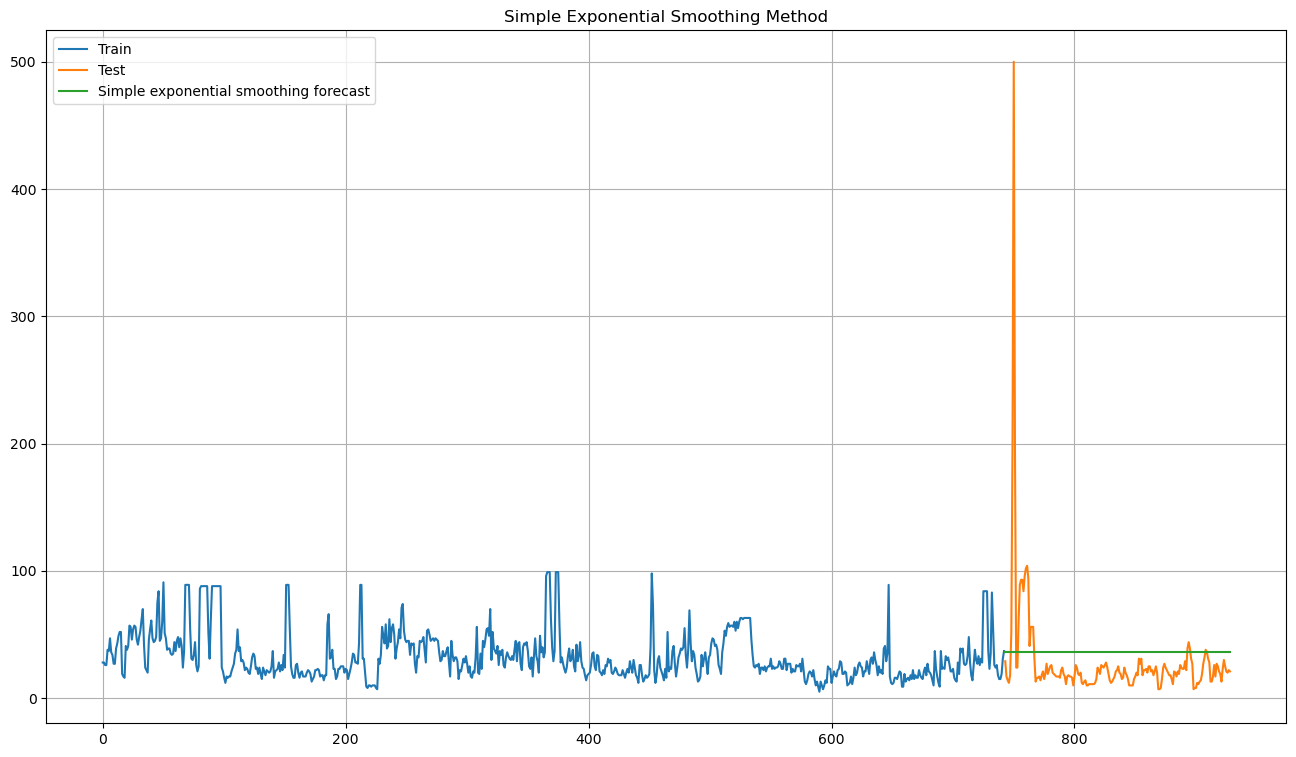

In [4]:
plt.figure(figsize=(16,9))
plt.grid()
plt.plot(train_df["AQI"], label='Train')
plt.plot(test_df["AQI"], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()